
# Visualizing Thermodynamic Surfaces 



https://github.com/sneshyba/pypchem/blob/2f86a079fdd3e0ee943e7669ae20a16873d786d1/Thermo%202017%20(Neshyba)/Thermodynamic_Surfaces.ipynb 

## Introduction

An _equation of state_ is any algebraic expression that relates
thermodynamic variables to one another. You’re probably familiar with the
equation of state for an ideal gas, written algebraically as $PV=nRT$.
Here, the pressure, volume, and temperature are thermodynamic variables; _n_
tells you how much of the gas there is, and _R_ is the gas constant. It’s
clear from this equation that once we know any two thermodynamic
variables, we can get the third, e.g.,

<p style='text-align: center;'>
$ P(V,T) = \dfrac{n R T}{V}$
</p>

We haven’t changed much in writing this; it’s still the equation of state for an ideal gas. But by writing _P(V,T)_ on the left hand side, we are signaling that we’re thinking about pressure as a _state function_ (because it depends on _T_ and _V_). Variables _T_ and _V_, the independent variables in this equation, define a two-dimensional _state space_. Equation 1 can be thought of geometrically as a surface in two dimensions. Josiah Willard Gibbs called these _thermodynamic surfaces_. James Clerk Maxwell famously made three plaster models of a thermodynamic surface, and gave one as a present to Gibbs. A photo of one is shown in Fig. 1.



<p style='text-align: center;'>

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/Maxwell%27s_thermodynamic_surface%2C_commentary_book_figures_1%2C2.jpg" height="300" width="300"/>
<img src="https://upload.wikimedia.org/wikipedia/commons/2/2a/Maxwell%27s_thermodynamic_surface%2C_commentary_book_figures_3%2C4.jpg" height="300" width="300"/>

__Figure 1__. Thermodynamic energy surface as a plaster model constructed by James Clerk Maxwell of an idealized water-like Substance. 
</p>


The idea of thermodynamic surfaces is quite general. The plaster model Maxwell gave to Gibbs showed the energy (_U_) as a function of the volume and entropy (_V_ and _S_) of an idealized water-like substance, which we would write shorthand as _U(V,S)_. But an important point is that _all_ substances (real or idealized) are characterized by thermodynamic surfaces. 



Of course the ideal gas equation does not describe real gases exactly; under some physical conditions, it’s a pretty good approximation, but under other physical conditions, large deviations from the real behavior are seen. That’s unfortunate in one sense, because it means real gases can’t be described with the algebraic elegance of Eq. 1. On the other hand, it turns out that the way a real gas differs from ideal-gas behavior can reveal important information about the gas molecules! A formula derived by van der Waals$^2$, 

<p style='text-align: center;'>
$ P(V,T) = \dfrac{n R T}{V-nb} -\dfrac{an^2}{V^2}  $
</p>


<p style='text-align: center;'>
$ P(V,T) = \dfrac{ R T}{v_m -b} -\dfrac{a}{v_m}  $
</p>

is a kind of compromise: it is not quite as elegant (or at least simple) as the ideal gas equation of state, but it has the great advantage that it describes real gases much better, because parameters _a_ and _b_ are adjusted for each gas.



In [1]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
import pylab
import seaborn as sns

sequential_colors = sns.color_palette("flare_r", n_colors=10)
sns.set_palette(sequential_colors)


%matplotlib notebook

# Error using the ideal and real Gas equation 

In [2]:
# Constants related to an ideal gas
R = 8.31415 # J/mol*K
V = 2 # m**3
T = 400 # K
n = 1 # mol

# van der Waals constants

#a = 3.4e4 # atm cm**6 / mol**2
a = 3.4e4*101325*1e-12 # Pa m**6 / mol**2

#b = 23.7  # cm**3 / mol**2
b = 23.7e-3  # m**3 / mol**2

# Get pressure of an ideal gas
P = n*R*T/V
print("Pressure of ideal gas = ", P, "Pa")

# Get pressure of a vdw gas
Pvdw = n*R*T/(V-n*b)-a*n**2/V**2
print("Pressure of vdw = ", Pvdw, "Pa")

# Get percent error 
Error = (P-Pvdw)/Pvdw*100
print("%Error = ", Error) 


Pressure of ideal gas =  1662.83 Pa
Pressure of vdw =  1682.7699731249918 Pa
%Error =  -1.1849494252599655


# Plot Isotherme

Text(0, 0.5, 'P (atm)')

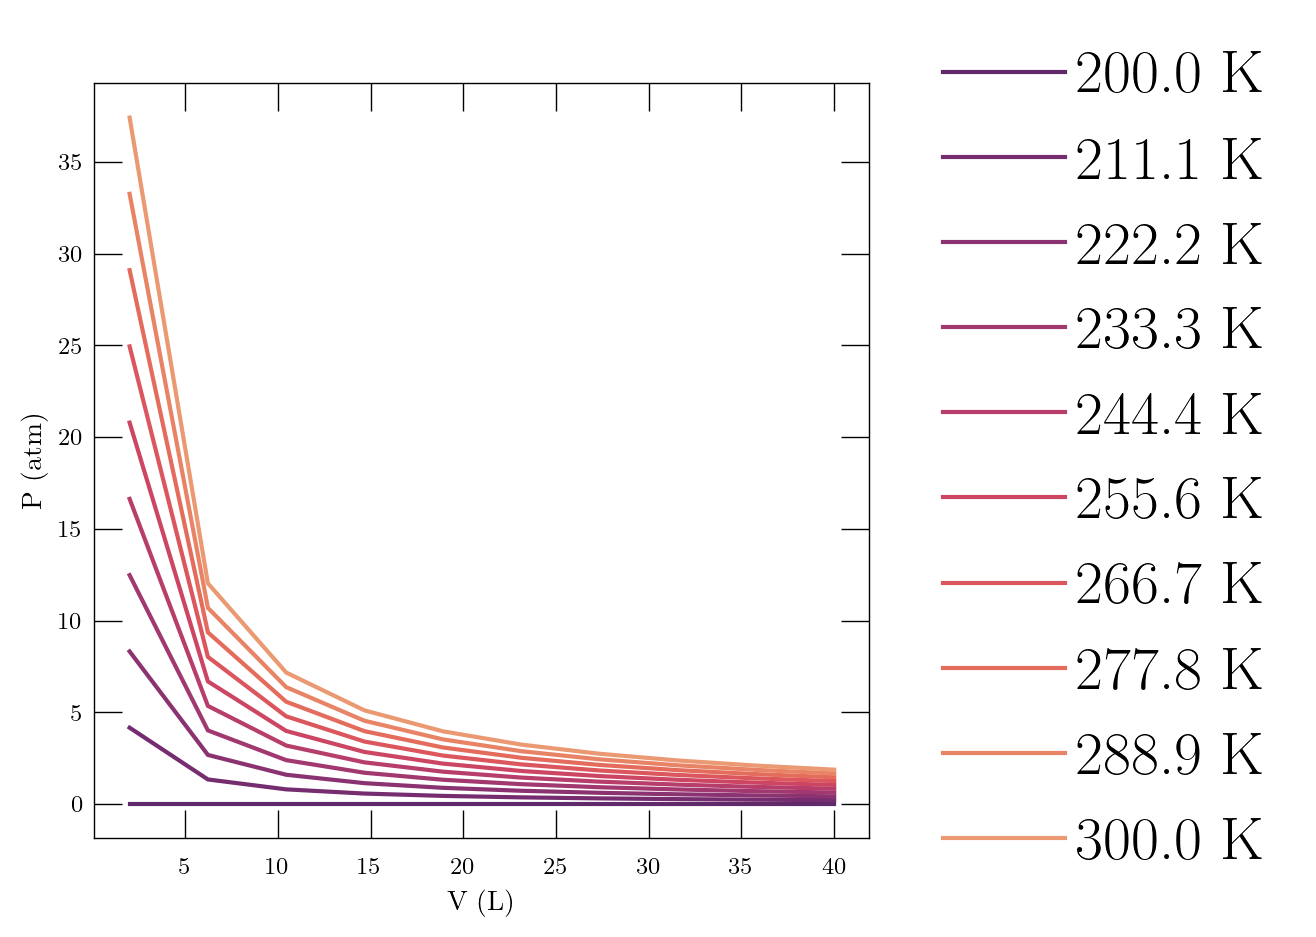

In [3]:
%matplotlib inline
pylab.rcParams['figure.figsize'] = (5, 5)
pylab.rcParams['figure.dpi'] = 200

    
N = 10                               # Number of lines
V_array = np.linspace(2,40,N)        # dm^3
T_array = np.linspace(200,300,N)     # K
V_grid, T_grid = np.meshgrid(V_array,T_array)


# Open up a figure window
plt.figure()

# Graph P(V)
for T in np.arange(len(T_grid[0])):
    plt.plot(V_grid[T], n*R*T/V_grid[T], label="%3.1f K"%T_array[T]) # Plot the ideal gas Boyle isotherm

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), labelspacing = 0.5)    
plt.xlabel('V (L)') # Label the x axis
plt.ylabel('P (atm)') # Label the y axis


# Plot Surface 

<IPython.core.display.Javascript object>


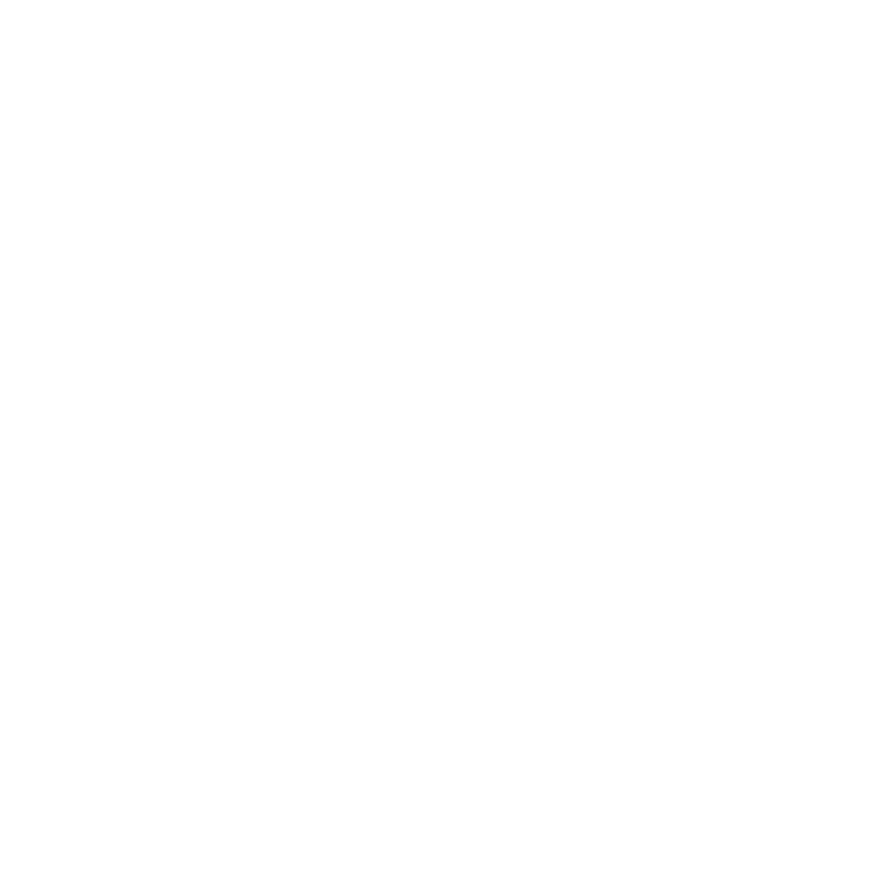

In [4]:

%matplotlib notebook
pylab.rcParams['figure.figsize'] = (5, 5)
pylab.rcParams['figure.dpi'] = 200

salmon=sns.color_palette("YlOrBr", as_cmap=True)


V_grid, T_grid = np.meshgrid(V_array,T_array) # Make a grid covering every V & T combination 

P = n*R*T_grid/V_grid

ofT= 400
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(V_grid, T_grid, P, alpha=.5)




ax.grid(False)

# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')



ax.set_xlabel('V / dm$^3$')
ax.set_ylabel('T / K')
ax.set_zlabel('p / atm')

plt.show()

<IPython.core.display.Javascript object>


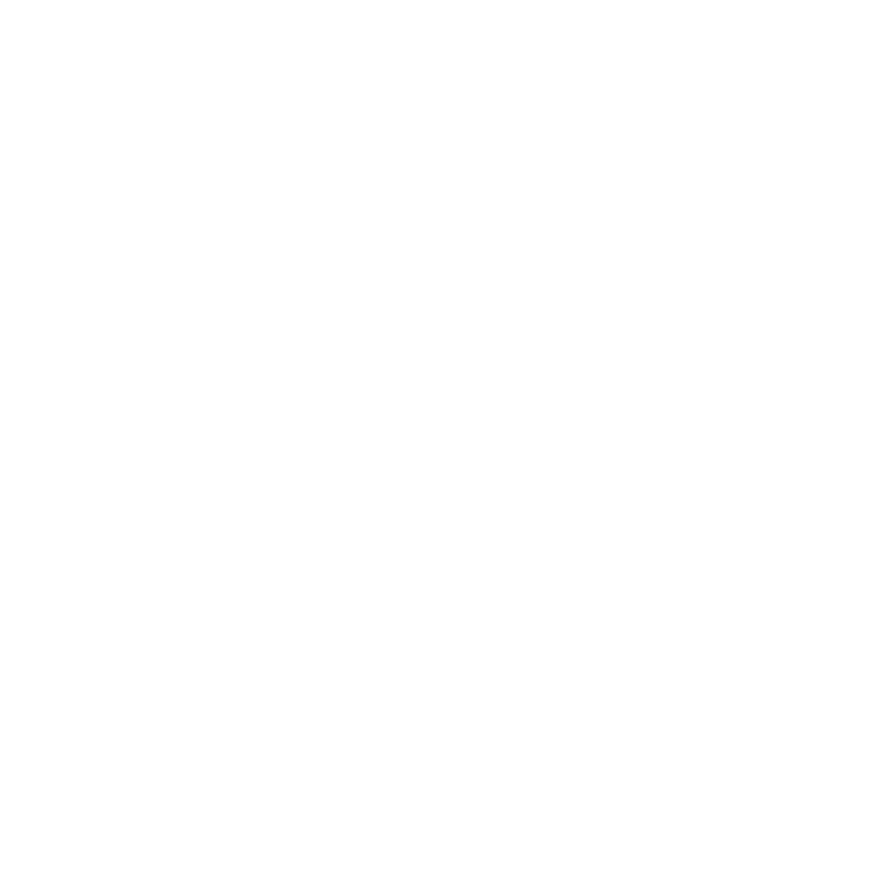

In [5]:

%matplotlib notebook
pylab.rcParams['figure.figsize'] = (5, 5)
pylab.rcParams['figure.dpi'] = 200

salmon=sns.color_palette("YlOrBr", as_cmap=True)


V_grid, T_grid = np.meshgrid(V_array,T_array) # Make a grid covering every V & T combination 

P = n*R*T_grid/V_grid

ofT= 400
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#cset = ax.contourf(V_grid, T_grid, P, zdir='z', offset=-20,zorder= 1000, cmap=salmon )
#ax.text(20,240,-50,s='ISOBARE', zorder=1000,size=15, color='k')


cset = ax.contourf(V_grid, T_grid, P, zdir='x', offset=-50, zorder= -50, cmap=salmon )
ax.text(20,400,60,s='ISOTHERME', zorder=10,size=15, color='k')


cset = ax.contourf(V_grid, T_grid, P, zdir='y', offset=ofT,zorder= -50, cmap=salmon)
ax.text(-50,240,60,s='ISOCHORE', zorder=10,size=15, color='k')

ax.plot_surface(V_grid, T_grid, P, alpha=.5)




ax.grid(False)

# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')



ax.set_xlabel('V / dm$^3$')
ax.set_ylabel('T / K')
ax.set_zlabel('p / atm')

plt.show()

<IPython.core.display.Javascript object>


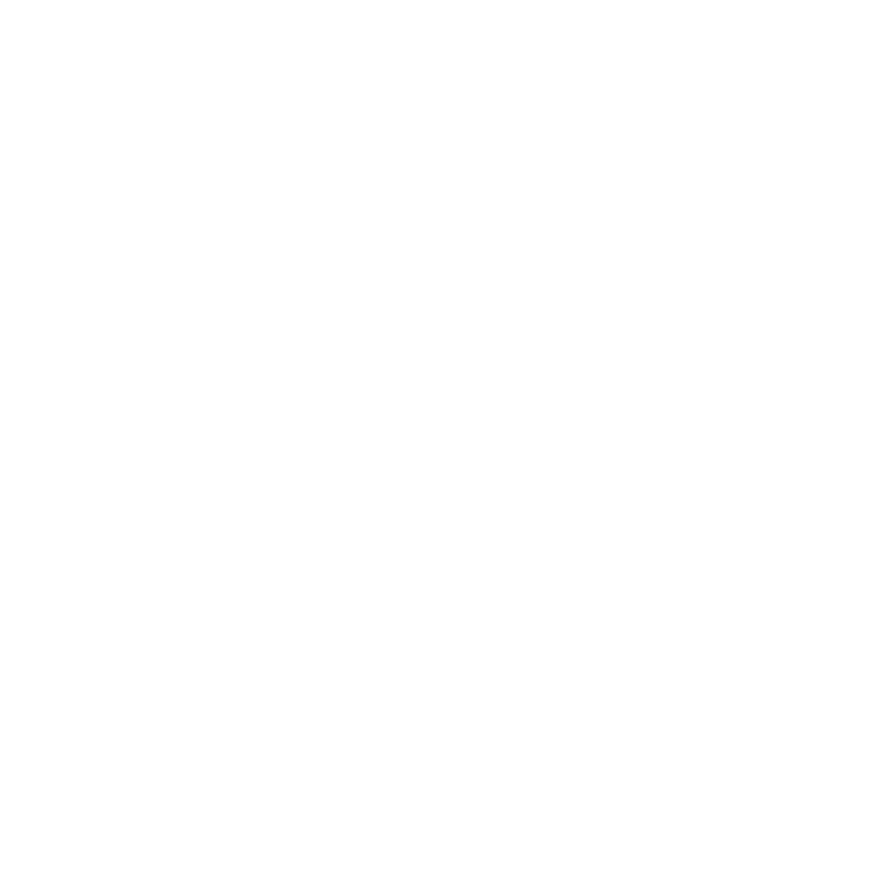

In [6]:

%matplotlib notebook
pylab.rcParams['figure.figsize'] = (5, 5)
pylab.rcParams['figure.dpi'] = 200

salmon=sns.color_palette("YlOrBr", as_cmap=True)


V_grid, T_grid = np.meshgrid(V_array,T_array) # Make a grid covering every V & T combination 

P = n*R*T_grid/V_grid

ofT= 400
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

cset = ax.contourf(V_grid, T_grid, P, zdir='z', offset=-20,zorder= 1000, cmap=salmon )
ax.text(20,240,-50,s='ISOBARE', zorder=1000,size=15, color='k')


#cset = ax.contourf(V_grid, T_grid, P, zdir='x', offset=-50, zorder= -50, cmap=salmon )
#ax.text(20,400,60,s='ISOTHERME', zorder=10,size=15, color='k')


#cset = ax.contourf(V_grid, T_grid, P, zdir='y', offset=ofT,zorder= -50, cmap=salmon)
#ax.text(-50,240,60,s='ISOCHORE', zorder=10,size=15, color='k')

ax.plot_surface(V_grid, T_grid, P, alpha=.5)




ax.grid(False)

# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')



ax.set_xlabel('V / dm$^3$')
ax.set_ylabel('T / K')
ax.set_zlabel('p / atm')

plt.show()

# Real Gas 

## Isotherms 

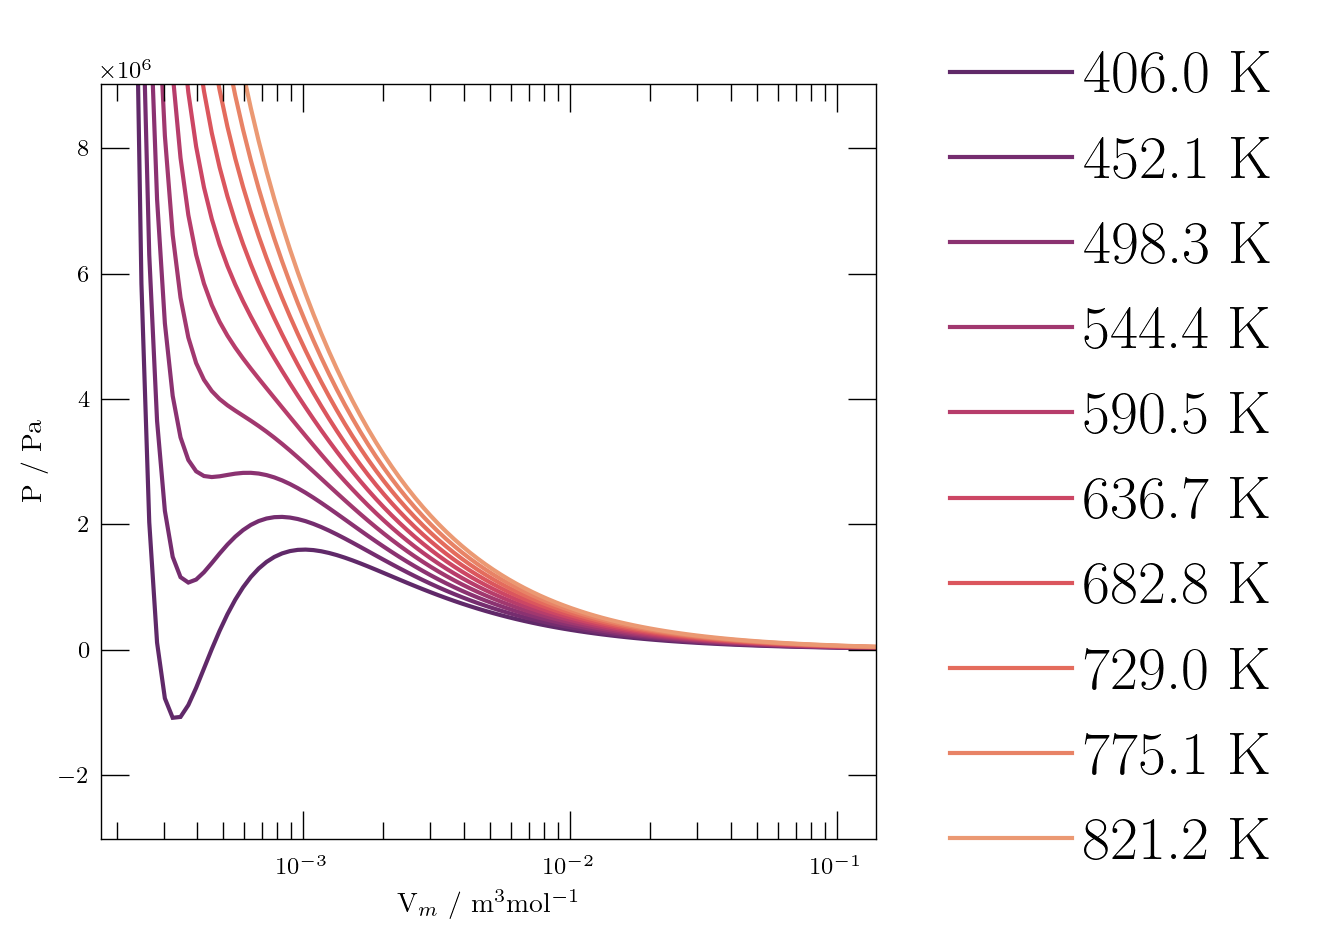

In [7]:
%matplotlib inline
pylab.rcParams['figure.figsize'] = (5, 5)
pylab.rcParams['figure.dpi'] = 200


def p_vdw(T,Vm):
    return R*T/(Vm - b) - a/Vm**2

R=8.3145

# Reduced Parameters 
Tc = 507.5 #K
Pc = 30.1e5 #Pa


# van der Waals constants
a = 27/64*((Tc**2)*(R**2)/Pc)
b = (R*Tc)/(8*Pc)


N = 100                               # Number of lines/points in mesh grid

V_array=np.logspace(np.log10(b*1.01),2+np.log10(R*Tc/Pc),N)  # Volume points on a logarithmic scale
T_array = np.linspace(0.8,1.7,N)*Tc     # K
V_grid, T_grid = np.meshgrid(V_array,T_array)



for T in np.arange(0,len(T_grid),10):
    plt.plot(V_grid[T], p_vdw(T_grid[T],V_grid[T]),  label="%3.1f K"%T_array[T])
    plt.ylim(-Pc,Pc*3)
    plt.xlim(b,(R*Tc/Pc)*100)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), labelspacing = 0.5)    
plt.xlabel('V$_{m}$ / m$^3$mol$^{-1}$ ') 
plt.ylabel('P / Pa') 
plt.xscale('log')

## fancy graph for every second temperature in T_array 

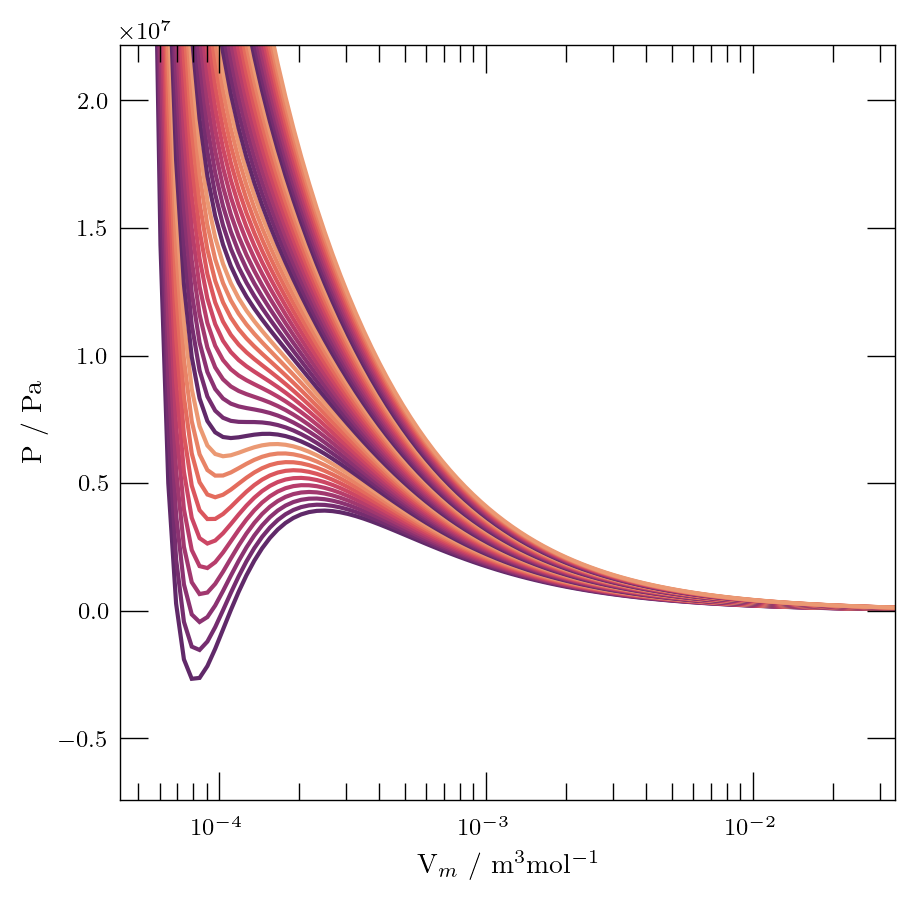

In [8]:
%matplotlib inline
pylab.rcParams['figure.figsize'] = (5, 5)
pylab.rcParams['figure.dpi'] = 200


def p_vdw(T,Vm):
    return R*T/(Vm - b) - a/Vm**2

def p_ideal(T,Vm):
    return R*T/Vm

R=8.3145



# Reduced Parameters 

#Hexane
Tc = 507.5 #K
Pc = 30.1e5 #Pa

#H2O
#Tc = 647.2 #K
#Pc = 217.7*101325 #Pa

#CO2
Tc = 304.3 #K
Pc = 73*101325 #Pa


#Xe
#Tc = 289.8 #K
#Pc = 58.2*101325 #Pa



# van der Waals constants
a = 27/64*((Tc**2)*(R**2)/Pc)
b = (R*Tc)/(8*Pc)


N = 100                               # Number of lines/points in mesh grid

V_array=np.logspace(np.log10(b*1.01),2+np.log10(R*Tc/Pc),N)  # Volume points on a logarithmic scale
T_array = np.linspace(0.8,1.7,N)*Tc     # K
V_grid, T_grid = np.meshgrid(V_array,T_array)



for T in np.arange(0,len(T_grid),2):
    plt.plot(V_grid[T], p_vdw(T_grid[T],V_grid[T]),  label="%3.1f K"%T_array[T])
    plt.ylim(-Pc,Pc*3)
    plt.xlim(b,(R*Tc/Pc)*100)
      
#+plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), labelspacing = 0.5)    
plt.xlabel('V$_{m}$ / m$^3$mol$^{-1}$ ') 
plt.ylabel('P / Pa') 
plt.xscale('log')

# Visualized VdW-Surface in 3d 

<IPython.core.display.Javascript object>


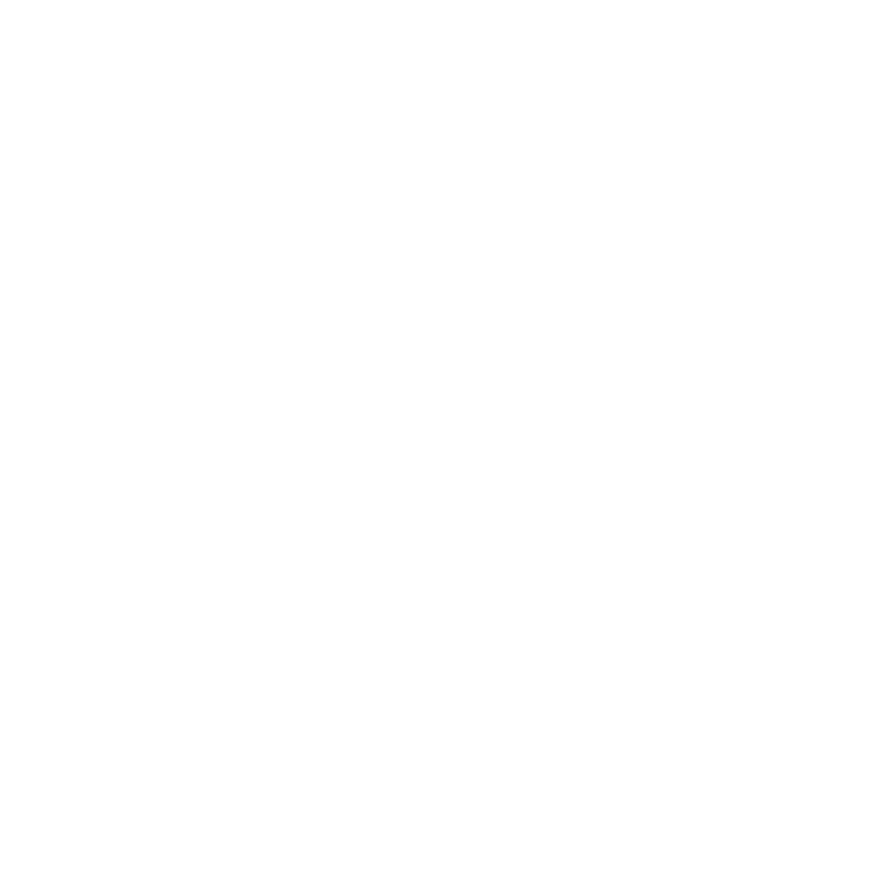

/tmp/ipykernel_3374759/4241246032.py:40: RuntimeWarning: invalid value encountered in log10
  P[P != 0] = np.log10(P[P != 0])
/tmp/ipykernel_3374759/4241246032.py:41: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  ax.plot_surface(np.log(V_grid), T_grid,  P , alpha=.5)


In [9]:
%matplotlib notebook
pylab.rcParams['figure.figsize'] = (5, 5)
pylab.rcParams['figure.dpi'] = 200




import matplotlib.ticker as mticker

# My axis should display 10⁻¹ but you can switch to e-notation 1.00e+01
def log_tick_formatter(val, pos=None):
    return f"$10^{{{int(val)}}}$"  # remove int() if you don't use MaxNLocator
    # return f"{10**val:.2e}"      # e-Notation




P=p_vdw(T_grid,V_grid)



ofT= 400
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#cset = ax.contourf(np.log(V_grid), T_grid, np.log(P) , zdir='z', offset=-20,zorder= 1000, cmap=cm.coolwarm)
#ax.text(20,240,-50,s='ISOBARE', zorder=1000,size=15, color='k')


#cset = ax.contourf(np.log(V_grid), T_grid, np.log(P) , zdir='y', offset=900, zorder= -50 ,cmap=cm.coolwarm)
#ax.text(20,400,60,s='ISOTHERME', zorder=10,size=15, color='k')



#cset = ax.contourf( np.log(V_grid) , T_grid, np.log(P) , zdir='x', offset=1e-12,zorder= -50, cmap=cm.coolwarm)
#ax.text(-50,240,60,s='ISOCHORE', zorder=10,size=15, color='k')


#P[P != 0] = np.log10(P[P != 0])
P[P != 0] = np.log10(P[P != 0])
ax.plot_surface(np.log(V_grid), T_grid,  P , alpha=.5)




ax.grid(False)

# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')


ax.xaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
ax.zaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
ax.zaxis.set_major_locator(mticker.MaxNLocator(integer=True))

ax.set_xlabel('V$_{m}$ / m$^3$mol$^{-1}$ ') # Label the x axis
#ax.set_xscale('log')
ax.set_ylabel('T / K')
ax.set_zlabel('p / Pa')

plt.show()

# CO2

<IPython.core.display.Javascript object>


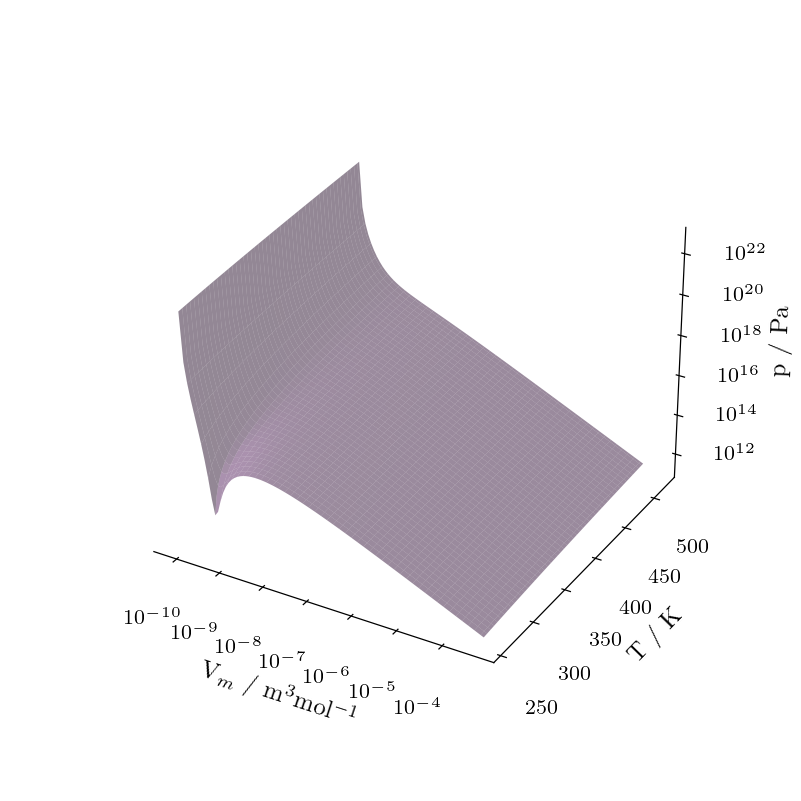

In [10]:
%matplotlib notebook
pylab.rcParams['figure.figsize'] = (5, 5)
pylab.rcParams['figure.dpi'] = 200




import matplotlib.ticker as mticker

# My axis should display 10⁻¹ but you can switch to e-notation 1.00e+01
def log_tick_formatter(val, pos=None):
    return f"$10^{{{int(val)}}}$"  # remove int() if you don't use MaxNLocator
    # return f"{10**val:.2e}"      # e-Notation



    
    
def p_vdw(T,Vm):
    return R*T/(Vm - b) - a/Vm**2

R=8.3145

# Reduced Parameters 

#H2O
#Tc = 647.2 #K
#Pc = 217.7*101325 #Pa

#CO2
Tc = 304.3 #K
Pc = 73*101325 #Pa


#Xe
#Tc = 289.8 #K
#Pc = 58.2*101325 #Pa


# van der Waals constants
a = 27/64*((Tc**2)*(R**2)/Pc)
b = (R*Tc)/(8*Pc)


N = 100                               # Number of lines/points in mesh grid

V_array=np.logspace(np.log10(b*1.01),2+np.log10(R*Tc/Pc),N)  # Volume points on a logarithmic scale
T_array = np.linspace(0.85,1.7,N)*Tc     # K
V_grid, T_grid = np.meshgrid(V_array,T_array)
    
    

P=p_vdw(T_grid,V_grid)



ofT= 400
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#cset = ax.contourf(np.log(V_grid), T_grid, np.log(P) , zdir='z', offset=-20,zorder= 1000, cmap=cm.coolwarm)
#ax.text(20,240,-50,s='ISOBARE', zorder=1000,size=15, color='k')


#cset = ax.contourf(np.log(V_grid), T_grid, np.log(P) , zdir='y', offset=900, zorder= -50 ,cmap=cm.coolwarm)
#ax.text(20,400,60,s='ISOTHERME', zorder=10,size=15, color='k')



#cset = ax.contourf( np.log(V_grid) , T_grid, np.log(P) , zdir='x', offset=1e-12,zorder= -50, cmap=cm.coolwarm)
#ax.text(-50,240,60,s='ISOCHORE', zorder=10,size=15, color='k')


#P[P != 0] = np.log10(P[P != 0])
#P[P != 0] = np.log10(P[P != 0])
ax.plot_surface(np.log(V_grid), T_grid,  np.log(P) , alpha=.5)




ax.grid(False)

# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')


ax.xaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
ax.zaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
ax.zaxis.set_major_locator(mticker.MaxNLocator(integer=True))

ax.set_xlabel('V$_{m}$ / m$^3$mol$^{-1}$ ') # Label the x axis
#ax.set_xscale('log')
ax.set_ylabel('T / K')
ax.set_zlabel('p / Pa')

plt.show()

# References
$^1$ http://hyperphysics.phy-astr.gsu.edu/hbase/thermo/pvtexp.html